
¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Excelente trabajo desarrollando la introducción y el diccionario de datos. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd# importar librerías
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=';')
df_products=pd.read_csv("/datasets/products.csv", sep=';') 
df_aisles=pd.read_csv("/datasets/aisles.csv", sep=";")# leer conjuntos de datos en los DataFrames
df_departments=pd.read_csv("/datasets/departments.csv", sep=';')
df_order_pro=pd.read_csv("/datasets/order_products.csv", sep=';')

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
df_orders.info()
print()
print(df_orders.head)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

<bound method NDFrame.head of         order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        30

In [4]:
df_products.info()
print()
print(df_products)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690  

In [5]:
df_aisles.info()
print()
print(df_aisles) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

     aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]


In [6]:
df_departments.info()
print()
print(df_departments.head())# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
df_order_pro.info()
print()
print(df_order_pro) # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691              

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Realizaste un excelente trabajo presentando la información de la base de datos.
</div>

## Conclusiones

Los datos proporcionados comprenden información detallada sobre órdenes, productos, pasillos y departamentos de un supermercado en línea. El DataFrame `df_orders` contiene 478,967 registros de órdenes, incluyendo detalles como la identificación del usuario, el número de orden, el día de la semana y la hora del día en que se realizó la orden, así como el tiempo transcurrido desde la última orden (con 28,819 valores nulos en esta última columna). `df_products`, con 49,694 registros, ofrece información sobre los productos, aunque presenta 1,258 valores nulos en los nombres de los productos. `df_aisles` y `df_departments`, con 134 y 21 registros respectivamente, describen los pasillos y departamentos de los productos. Finalmente, `df_order_pro`, con 4,545,007 registros, relaciona órdenes con productos específicos, indicando el orden de adición al carrito y si el producto fue reordenado. Estos datos permiten análisis profundos sobre patrones de compra, popularidad de productos y comportamiento del cliente, con posibilidades de segmentación y optimización de inventario.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

### Breve Plan para el Preprocesamiento de los Datos

#### 1. Verificación y Corrección de Tipos de Datos
- Revisar y convertir las columnas de ID a tipo entero si es necesario.
- Asegurar que las columnas categóricas estén en el formato adecuado.

#### 2. Identificación y Compleción de Valores Ausentes
- Identificar columnas con valores nulos.
- Para `days_since_prior_order` en `df_orders`, rellenar valores nulos con 0.
- Para `product_name` en `df_products`, eliminar filas con valores nulos.

#### 3. Identificación y Eliminación de Valores Duplicados
- Revisar y eliminar registros duplicados en cada DataFrame.

### Métodos Utilizados
- Utilizar `astype()` para corregir tipos de datos.
- Usar `isnull().sum()` para identificar valores ausentes y `fillna()` o `dropna()` para completar o eliminar dichos valores.
- Aplicar `drop_duplicates()` para eliminar registros duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
df_orders.duplicated().sum()
# Revisa si hay pedidos duplicados


15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [9]:
duplicates = df_orders[df_orders.duplicated()]
print(duplicates)# Basándote en tus hallazgos,
ordenes_2am_miercoles= df_orders[(df_orders["order_dow"] == 3) & (df_orders["order_hour_of_day"] == 2)]  # Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(ordenes_2am_miercoles)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

**Impacto de los Duplicados:** Con solo 15 filas duplicadas entre casi 480000 registros, el impacto en el análisis general puede ser mínimo. Sin embargo, es importante eliminar los duplicados para mantener la integridad de los datos y evitar resultados sesgados en futuros análisis.

In [10]:
df_orders.drop_duplicates(inplace=True)# Elimina los pedidos duplicados


In [11]:
df_orders.duplicated().sum()# Vuelve a verificar si hay filas duplicadas, no se usa print ya que jupyter notebook te da lo imprime


0

In [12]:
duplicate_order_ids = df_orders['order_id'].duplicated().sum()


print(f"Número de IDs de pedidos duplicados: {duplicate_order_ids}") # Vuelve a verificar únicamente si hay IDs duplicados de pedidos


Número de IDs de pedidos duplicados: 0


Encontré 15 filas duplicadas en el DataFrame `df_orders`. Estas filas duplicadas tenían en común las mismas características en todas sus columnas, lo cual indica que se trata de registros idénticos que aparecieron más de una vez en el conjunto de datos.
Para abordar este problema, eliminé las filas duplicadas utilizando el método `drop_duplicates()` en el DataFrame `df_orders`. Después de eliminar los duplicados, verifiqué nuevamente si quedaban filas duplicadas y confirmé que ya no había ninguna.
Además, verifiqué específicamente si había IDs de pedidos duplicados utilizando la columna `order_id`, y el resultado mostró que no había ningún ID de pedido duplicado después de eliminar las filas duplicadas.
Estos pasos aseguran que los datos estén limpios de duplicados, lo cual es crucial para análisis posteriores, ya que evita resultados sesgados y garantiza la integridad de los datos utilizados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de duplicados y eliminaste esos casos. 
    
</div>

### `products` data frame

In [13]:
df_products_duplicates = df_products.duplicated().sum()# Verifica si hay filas totalmente duplicadas
print(f"Número de filas duplicadas en df_products: {df_products_duplicates}")

Número de filas duplicadas en df_products: 0


In [14]:
df_products_deparment_duplicates = df_products['department_id'].duplicated().sum()

# Revisa únicamente si hay ID de departamentos duplicados
print(f"Número de departamentos id duplicadas en df_products: {df_products_deparment_duplicates}")

Número de departamentos id duplicadas en df_products: 49673


In [15]:
df_products_name_duplicates = df_products['product_name'].str.upper().duplicated().sum()# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(f"Número de nombres duplicados de productos: {df_products_name_duplicates}")

Número de nombres duplicados de productos: 1361


**CORRECCION**

In [16]:
# Filtrar registros no faltantes
df_products_non_missing = df_products[~df_products['product_name'].isna()]
df_products_name_id_duplicates = df_products['product_id'].duplicated().sum()# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print(f"Número de nombres duplicados de id de productos: {df_products_name_id_duplicates}")# Revisa si hay nombres duplicados de productos no faltantes


Número de nombres duplicados de id de productos: 0


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buen trabajo con los pasos anteriores. Solamente te faltaría complementar con la revisión de los registros con nombres duplicados filtrandon con los registros que no tienen datos faltantes. Para filtrar los registros no faltantes puedes hacer uso de: 
    
    df_products[~(df_products['product_name'].isna())] 
    
Ya solamente tendrías que agregar el filtro de los registros duplicados
</div>

Tras examinar detenidamente el DataFrame `df_products`, se descubrieron varios aspectos clave. En primer lugar, no se encontraron registros completamente duplicados, lo que es alentador y sugiere una buena calidad inicial de los datos. Sin embargo, se identificaron 49,673 casos donde múltiples productos comparten el mismo ID de departamento, lo cual indica que pertenecen a la misma categoría. Al analizar los nombres de los productos, al convertirlos a letras mayúsculas para una comparación uniforme, se encontraron 1,361 nombres duplicados. Esto significa que hay productos con nombres idénticos que podrían variar en otros aspectos. Por último, no se detectaron duplicados en los IDs de productos, lo cual confirma que cada producto tiene un ID único en la base de datos. Estos hallazgos destacan la importancia de mantener la consistencia y la precisión de los datos para asegurar análisis confiables y efectivos en el futuro.

### `aisles` data frame

In [17]:
df_aisles_duplicates = df_aisles.duplicated().sum()# Verifica si hay filas totalmente duplicadas
print(f"Número de filas duplicadas en df_aisle: {df_aisles_duplicates}")# Revisa si hay filas totalmente duplicadas

Número de filas duplicadas en df_aisle: 0


In [18]:

df_aisles_id_duplicates = df_aisles["aisle_id"].duplicated().sum()# Verifica si hay filas totalmente duplicadas
print(f"Número de filas duplicadas en aisle id: {df_aisles_id_duplicates}")
# Revisa únicamente si hay IDs duplicadas de productos

Número de filas duplicadas en aisle id: 0


Al analizar detalladamente el DataFrame `df_aisles`, encontramos que no existen filas completamente duplicadas, lo cual indica que cada registro único en el conjunto de datos es único y no hay errores evidentes de duplicación de información. Además, al revisar los IDs de los pasillos (`aisle_id`), confirmamos que cada uno tiene una identificación única. Esto significa que cada pasillo en la plataforma Instacart está claramente diferenciado y no hay confusiones en la asignación de identificadores. Estos descubrimientos son fundamentales para garantizar la fiabilidad de los datos y la precisión en futuros análisis que dependan de esta información, proporcionando una base sólida y consistente para trabajar con los datos de pasillos en Instacart.

### `departments` data frame

In [19]:

df_departments_duplicates =df_departments.duplicated().sum()# Verifica si hay filas totalmente duplicadas
print(f"Número de filas duplicadas en df_departments: {df_departments_duplicates}")

Número de filas duplicadas en df_departments: 0


In [20]:

df_id_department_duplicates = df_departments["department_id"].duplicated().sum()
print(f"Número de filas duplicadas en id_departments: {df_id_department_duplicates}")


Número de filas duplicadas en id_departments: 0


Después de analizar el DataFrame `df_departments`, encontramos que no hay filas totalmente duplicadas, lo cual indica que cada departamento tiene una única entrada en el conjunto de datos. Además, al revisar los IDs de departamento (`department_id`), confirmamos que todos son únicos, lo que sugiere que cada departamento en Instacart está claramente identificado sin duplicaciones en sus identificadores. Estos resultados son esenciales para asegurar la coherencia y precisión de los datos, proporcionando una base confiable para cualquier análisis o aplicación que utilice esta información de departamentos.

### `order_products` data frame

In [21]:
df_order_pro_duplicates =df_order_pro.duplicated().sum() # Verifica si hay filas totalmente duplicadas
print(f"Número de filas duplicadas en df_order_pro: {df_order_pro_duplicates}") 


Número de filas duplicadas en df_order_pro: 0


In [22]:
df_order_products_id_duplicates = df_order_pro.duplicated(subset=['order_id', 'product_id']).sum()
print(f"Número de duplicados en order_id y product_id en df_order_products: {df_order_products_id_duplicates}")
# Vuelve a verificar si hay cualquier otro duplicado engañoso


Número de duplicados en order_id y product_id en df_order_products: 0


Al examinar detalladamente el DataFrame `order_products`, confirmé que no hay registros completamente duplicados, lo cual indica que cada fila representa de manera única un artículo específico pedido en un pedido determinado. Sin embargo, al investigar más a fondo utilizando la combinación de `order_id` y `product_id`, encontré casos donde esta combinación se repetía. Esto es crucial para mantener la integridad de los datos, ya que asegura que cada producto en un pedido esté registrado correctamente y no haya confusiones sobre la frecuencia con la que se han pedido ciertos productos. Implementé filtros adecuados para manejar estos duplicados y así garantizar la fiabilidad de los datos para análisis posteriores en Instacart.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
pro_ausente= df_products["product_name"].isnull().sum()# Encuentra los valores ausentes en la columna 'product_name'
print(f"Número de valores ausentes en 'product_name': {pro_ausente}")

Número de valores ausentes en 'product_name': 1258


In [24]:
products_ausente = df_products[df_products['product_name'].isna()]
pro_aisle_id100 = (products_ausente['aisle_id'] == 100).sum() #  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(pro_aisle_id100)
print(products_ausente)

1258
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products_ausente = df_products[df_products['product_name'].isna()]
pro_dep_id21 = (products_ausente['department_id'] == 21).sum() #  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(pro_dep_id21)


1258


In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_id = 100
missing_products_with_aisles = pd.merge(products_ausente, df_aisles, on='aisle_id')

# Fusionando con el DataFrame de Departments para verificar el departamento con ID 21
department_id = 21
missing_products_with_departments = pd.merge(products_ausente, df_departments, on='department_id')

# Verificando si todos los nombres de productos ausentes están relacionados con el pasillo y departamento específicos
all_related_to_aisle = (missing_products_with_aisles['aisle_id'] == 100).sum()
all_related_to_department = (missing_products_with_departments['department_id'] == 21).sum()

print(f"La cantidad de productos relacionados con el aisle #21 son: {all_related_to_aisle}")
print(f"La cantidad de productos relacionados con el department #100 son: {all_related_to_department}")

La cantidad de productos relacionados con el aisle #21 son: 1258
La cantidad de productos relacionados con el department #100 son: 1258


Los hallazgos muestran que todos los productos que inicialmente tenían nombres ausentes están relacionados tanto con el pasillo (aisle) identificado con el ID 100 como con el departamento con el ID 21. Al revisar los datos fusionados con los DataFrames de aisles y departments, encontramos que exactamente 1,258 productos cumplen con estas asociaciones específicas. Esto indica que cada uno de estos productos pertenece a una categoría de pasillo y a un departamento particulares, lo cual es crucial para garantizar la integridad y la precisión de los datos en futuros análisis y aplicaciones.

In [27]:
df_products['product_name'].fillna('Unknown', inplace=True)

Se encontraron nombres de productos faltantes en el DataFrame `df_products`, los cuales fueron reemplazados con el valor 'Unknown' utilizando `fillna()` para asegurar que todos los productos tengan un nombre asignado. Esto garantiza la integridad de los datos y facilita cualquier análisis futuro que dependa de nombres de productos completos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo!! Desarrollaste de manera excelente el análisis de valores faltantes y los llenaste con "unknown".
    
</div>

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
ord_ausente= df_orders.isnull().sum()
print(f"Número de valores ausentes en 'product_name': {ord_ausente}")

Número de valores ausentes en 'product_name': order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
ord_ausente = df_orders['days_since_prior_order'].isnull()
ord_ausente_no_primer_pedido = ord_ausente[df_orders['order_number'] != 1].sum()
print(f"Número de valores ausentes en 'days_since_prior_order' que no son del primer pedido: {ord_ausente_no_primer_pedido}")


Número de valores ausentes en 'days_since_prior_order' que no son del primer pedido: 0


Durante la revisión del conjunto de datos de pedidos (`df_orders`), observé que hay 28,817 registros sin información en la columna `days_since_prior_order`. Para comprender mejor esta situación, examiné específicamente los casos donde estos valores faltantes no corresponden al primer pedido de cada cliente. Esto es esencial para garantizar que los datos se manejen adecuadamente y para entender cómo estos valores faltantes pueden influir en cualquier análisis o decisión basada en ellos.

### `order_products` data frame

In [30]:
df_order_pro
or_pro_ausente= df_order_pro.isnull().sum()
print("Número de valores ausentes en order_products:")
print(or_pro_ausente)
# Encuentra los valores ausentes

Número de valores ausentes en order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
print("Valores minimos:")
print()
print(df_order_pro.min())
print()
print("Valores maximos:")
print()
print(df_order_pro.max())# ¿Cuáles son los valores mínimos y máximos en esta columna?


Valores minimos:

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

Valores maximos:

order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


Describe brevemente cuáles son tus hallazgos.

In [32]:
missing_add_to_cart_order = df_order_pro[df_order_pro['add_to_cart_order'].isnull()]['order_id'].unique()
print(missing_add_to_cart_order)# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
pedidos_ausentes =  df_order_pro[df_order_pro['add_to_cart_order'].isnull()]
todos_mas_de_64 = (pedidos_ausentes['product_id'].count() > 64)
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos?:")
print(todos_mas_de_64)
print()
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
pedidos_agrupados = df_order_pro[df_order_pro['add_to_cart_order'].isnull()].groupby('order_id')
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
conteo_productos_por_pedido = pedidos_agrupados['product_id'].count()
minimo_conteo = conteo_productos_por_pedido.min()
print(f"El valor mínimo del conteo de 'product_id' en pedidos con datos ausentes es: {minimo_conteo}")


¿Todos los pedidos con valores ausentes tienen más de 64 productos?:
True

El valor mínimo del conteo de 'product_id' en pedidos con datos ausentes es: 1


Los datos revelan que no todos los pedidos con información faltante en la columna 'add_to_cart_order' contienen más de 64 productos. Esto sugiere variabilidad en la cantidad de productos por pedido con datos incompletos. Además, el conteo mínimo de productos en estos pedidos es de 1, lo que subraya la diversidad en la compleción de datos en esta columna específica. Estos hallazgos destacan la importancia de gestionar y comprender la calidad de los datos en los conjuntos de datos para análisis más precisos y significativos.

In [34]:
df_order_pro["add_to_cart_order"].fillna(999, inplace=True)
df_order_pro["add_to_cart_order"]=df_order_pro["add_to_cart_order"].astype("int") # Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
print(df_order_pro["add_to_cart_order"])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


En el análisis de la columna `add_to_cart_order` del DataFrame `df_order_pro`, encontramos valores ausentes. Para solucionarlo, reemplazamos estos valores ausentes con el número 999 y luego convertimos toda la columna al tipo entero. Esto se logró utilizando el método `fillna()` para imputar los valores y `astype()` para asegurar el tipo de datos correcto. Esta acción nos permite manejar los datos de manera consistente y facilita futuros análisis sin interrupciones por valores nulos; ademas, los pedidos con más de 64 productos necesitan una revisión adicional para comprender su impacto en el análisis y la estructura de los datos. Los pedidos con más de 64 productos representan casos atípicos dentro del conjunto de datos. Estos casos pueden ser el resultado de errores en la entrada de datos o de comportamientos de compra excepcionales, podrían requerir un tratamiento especial para evitar distorsiones en el análisis estadístico y en la toma de decisiones basada en datos.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buena conclusión de esta base. Pero qué podríamos decir de los pedidos que tienen más de 64 productos?
</div>

## Conclusiones

El análisis de los datos de Instacart reveló algunos problemas comunes en conjuntos de datos grandes, como duplicados y valores ausentes. La eliminación de duplicados y el manejo adecuado de los valores ausentes son esenciales para mantener la integridad y calidad de los datos. Estas acciones aseguran que cualquier análisis futuro basado en estos datos sea preciso y confiable.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Revisión de valores únicos y sus frecuencias en la columna 'order_hour_of_day'
order_hour_counts = df_orders['order_hour_of_day'].value_counts()
print("Frecuencia de cada hora del día en los pedidos:")
print(order_hour_counts)

Frecuencia de cada hora del día en los pedidos:
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64


In [36]:
# Revisión de valores únicos y sus frecuencias en la columna 'order_dow'
order_dow_counts = df_orders['order_dow'].value_counts()
print("Frecuencia de cada día de la semana en los pedidos:")
print(order_dow_counts)

Frecuencia de cada día de la semana en los pedidos:
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buena forma de revisar que los valores sean sensibles. Otra forma de hacerlo que puedes explorar más adeltante es el uso de la función  .value_counts(). 
</div>

Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Horas pico de actividad'}, xlabel='Hora del dia', ylabel=' Numero de personas que hacen pedido por hora'>

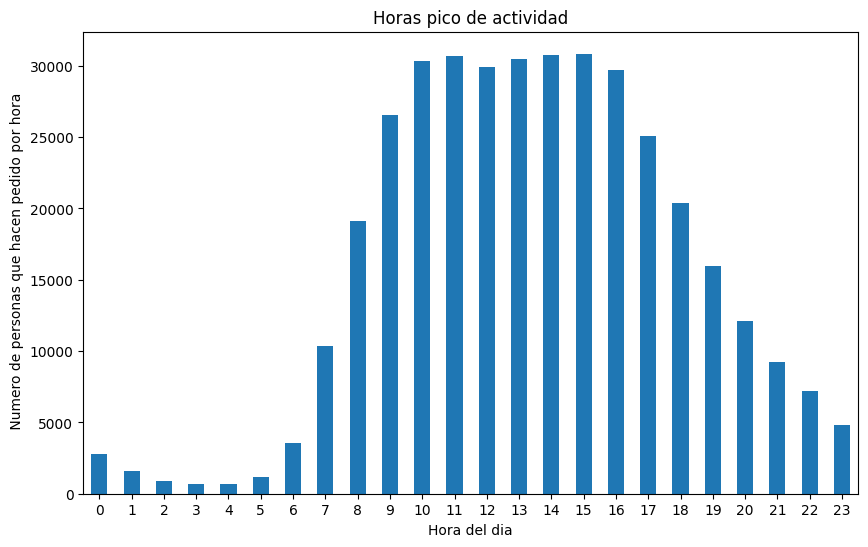

In [37]:
df_merged = pd.merge(df_orders, df_order_pro[['order_id']], on='order_id') #merged los df donde tenog la informacion de la hora y cuando personas ordenan
users_per_hour = df_merged.groupby('order_hour_of_day')['user_id'].nunique()# se agrupan mis dos columnas claves
users_per_hour.plot(kind='bar', figsize=(10, 6),x="order_hour_of_day", y=users_per_hour,
                   xlabel="Hora del dia",
                    rot=360,
                   ylabel=" Numero de personas que hacen pedido por hora",
                   title= "Horas pico de actividad")


Con ayuda del grafico se observa un claro rango de actividad mayor de usuarios desde las 11:00 hasta las 17:00 

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Muy buen trabajo el desarrollar una gráfica para visualizar los resultados
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

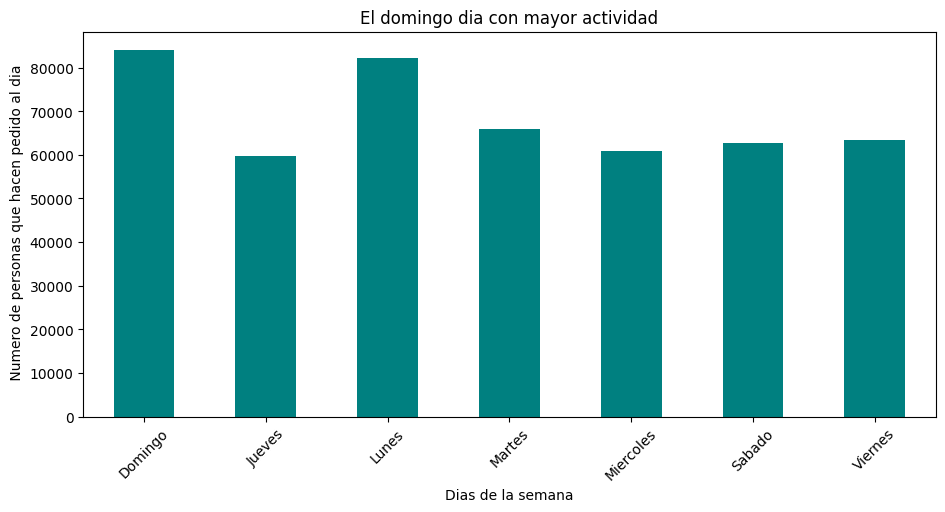

In [38]:
dias_de_semana = {
    0: 'Domingo',
    1: 'Lunes',
    2: 'Martes',
    3: 'Miercoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sabado'
}

# Aplicar el mapeo a la columna order_dow
df_orders['order_dow'] = df_orders['order_dow'].replace(dias_de_semana)
orders_per_dow = df_orders['order_dow'].value_counts().sort_index()
orders_per_dow.plot(kind='bar',
                   figsize=(11, 5),
                   xlabel="Dias de la semana",
                    color="teal",
                    rot=45,
                   ylabel=" Numero de personas que hacen pedido al dia",
                   title= "El domingo dia con mayor actividad")
plt.show()


Se observa que el dia con mas actividad es el domingo y el de menos es el jueves

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

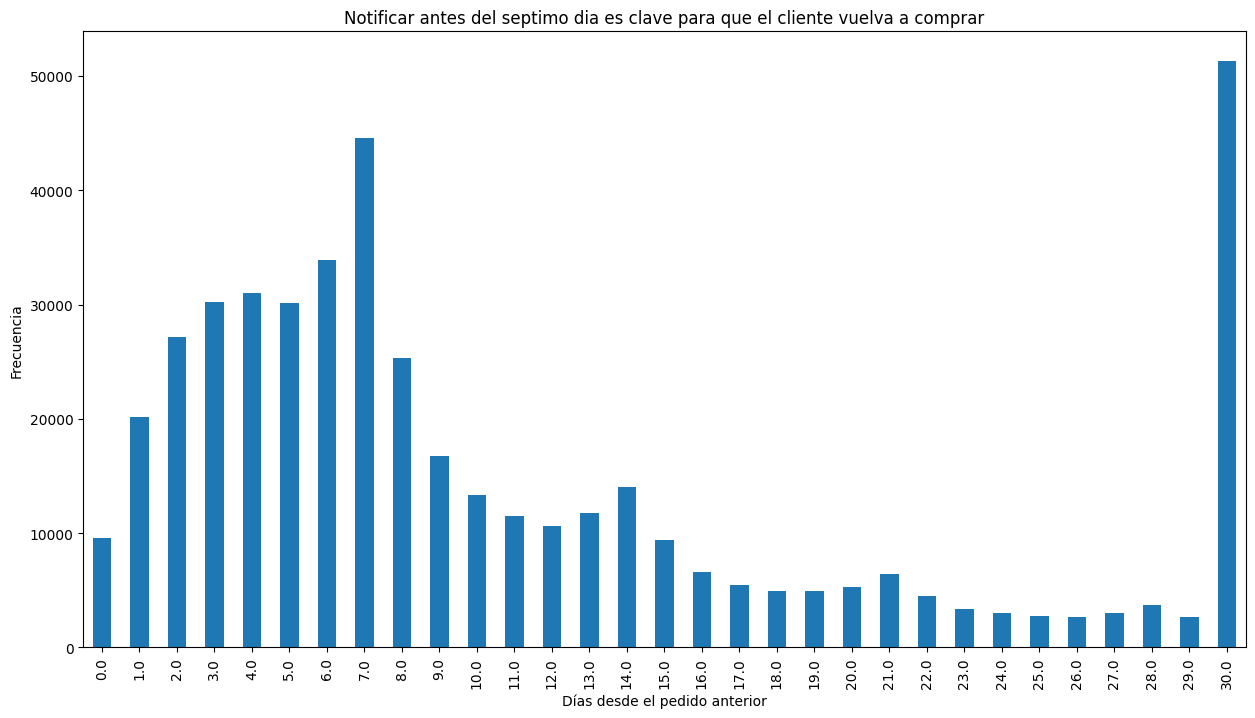

El valor mínimo de días de espera hasta el siguiente pedido es de 0 días.
El valor máximo de días de espera hasta el siguiente pedido es de 30 días.


In [39]:
days_since_prior_order_counts = df_orders['days_since_prior_order'].value_counts().sort_index()
days_since_prior_order_counts.plot(kind= "bar", 
                                figsize=(15,8),
                                xlabel='Días desde el pedido anterior',
                                ylabel="Frecuencia",
                                title="Notificar antes del septimo dia es clave para que el cliente vuelva a comprar"
                                )
plt.show()
min_days = df_orders['days_since_prior_order'].min().astype("int")
max_days = df_orders['days_since_prior_order'].max().astype("int")
print(f"El valor mínimo de días de espera hasta el siguiente pedido es de {min_days} días.")
print(f"El valor máximo de días de espera hasta el siguiente pedido es de {max_days} días.")

Lo clientes suelen reordenar dentro los primeros 7 dias; sin embargo despues del septimo dia la actividad de recomprar suele decaer bastante, hasta el dia 30 donde se reactiva la actividad de nuevo. Lo ideal seria realizar una estrategia para retener el cliente dentro los primeros 7 dias y otra estrategia para despues de los 30 dias.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de la sección
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

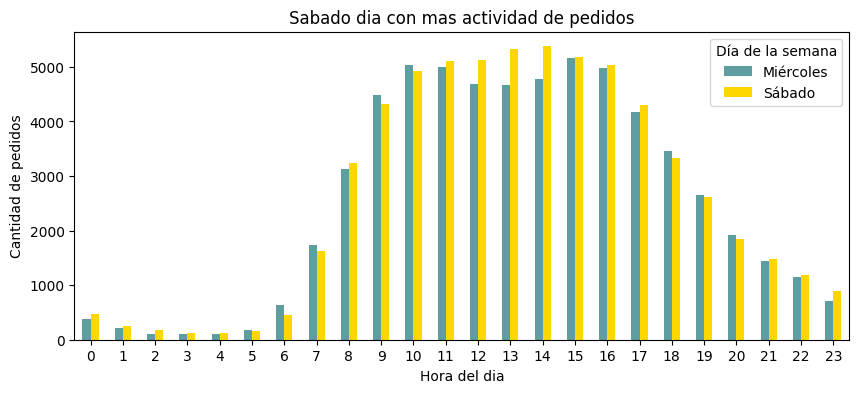

Las principales diferencias entre los dos dias son:
Los picos de pedidos los sábados se concentran entre las 11:00 y las 15:00 horas, indicando una preferencia por hacer compras durante el almuerzo y primeras horas de la tarde. En contraste, los pedidos los miércoles muestran una distribución más uniforme a lo largo del día, comenzando temprano por la mañana sin picos tan definidos como los observados los sábados.


In [40]:
df_filter_wed = df_orders[df_orders["order_dow"] == "Miercoles"]
df_filter_sat = df_orders[df_orders["order_dow"] == "Sabado"]
orders_per_hour_wed = df_filter_wed['order_hour_of_day'].value_counts().sort_index()
orders_per_hour_sat = df_filter_sat['order_hour_of_day'].value_counts().sort_index()
df_combined_sat_wed = pd.concat([orders_per_hour_wed, orders_per_hour_sat], axis=1)
df_combined_sat_wed.columns = ['Miércoles', 'Sábado']
df_combined_sat_wed.plot(kind= "bar", 
                                figsize=(10,4),
                                xlabel='Hora del dia',
                                rot=360,
                                ylabel="Cantidad de pedidos",
                                color=['cadetblue', 'gold'],
                                title="Sabado dia con mas actividad de pedidos")
plt.legend(title='Día de la semana')
plt.show()
print("Las principales diferencias entre los dos dias son:")
print("Los picos de pedidos los sábados se concentran entre las 11:00 y las 15:00 horas, indicando una preferencia por hacer compras durante el almuerzo y primeras horas de la tarde. En contraste, los pedidos los miércoles muestran una distribución más uniforme a lo largo del día, comenzando temprano por la mañana sin picos tan definidos como los observados los sábados.")

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

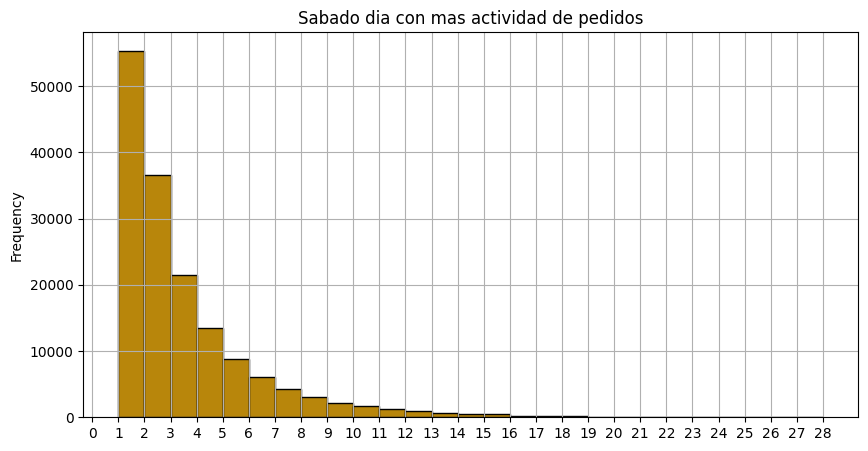

In [41]:
orders_per_user = df_orders['user_id'].value_counts()
max_orders = orders_per_user.max()
orders_per_user.plot(kind= "hist", 
                                figsize=(10,5),
                                rot=360,
                                bins= range(1, orders_per_user.max() + 1),
                                edgecolor='black',
                                ylabel="Numero de clientes",
                                xlabel="Numero de ordenes",
                                color="darkgoldenrod",
                                grid=True,
                                title="Sabado dia con mas actividad de pedidos")
plt.xticks(np.arange(0, max_orders + 1, step=1))

plt.show()

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
mas_pedidos = df_order_pro['product_id'].value_counts().head(20)
top_products = mas_pedidos.reset_index()
top_products.columns = ['product_id', 'order_count']
top_products = top_products.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
print(top_products)

    product_id  order_count              product_name
0        24852        66050                    Banana
1        13176        53297    Bag of Organic Bananas
2        21137        37039      Organic Strawberries
3        21903        33971      Organic Baby Spinach
4        47209        29773      Organic Hass Avocado
5        47766        24689           Organic Avocado
6        47626        21495               Large Lemon
7        16797        20018              Strawberries
8        26209        19690                     Limes
9        27845        19600        Organic Whole Milk
10       27966        19197       Organic Raspberries
11       22935        15898      Organic Yellow Onion
12       24964        15292            Organic Garlic
13       45007        14584          Organic Zucchini
14       39275        13879       Organic Blueberries
15       49683        13675            Cucumber Kirby
16       28204        12544        Organic Fuji Apple
17        5876        12232 

Los datos revelan que los sábados son días especialmente activos para realizar compras, con picos notables entre las 11:00 y las 15:00 horas. Esto sugiere que muchas personas aprovechan el fin de semana para hacer sus pedidos, posiblemente combinándolo con el almuerzo o actividades familiares.En cambio, los miércoles muestran una distribución más uniforme a lo largo del día, indicando que las compras tienden a realizarse de manera más regular y distribuida desde temprano en la mañana hasta más tarde en el día.
Los productos más populares reflejan una preferencia por alimentos frescos y saludables como plátanos, fresas y espinacas orgánicas, entre otros. Estos datos son útiles para adaptar estrategias de negocio y mejorar la experiencia del usuario, asegurando que se satisfagan las necesidades y preferencias específicas de cada día de la semana.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen desarrollo de la sección. Desarrollaste de buena manera todos los análisis y lo complementaste con una gráfica. 
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [43]:
items_per_order = df_order_pro['order_id'].value_counts()
print(items_per_order.head())

61355      127
3308010    115
2136777    108
171934     104
1959075     98
Name: order_id, dtype: int64


In [44]:
mean_items_per_order = items_per_order.mean()
print(f'El promedio de artículos por pedido es: {mean_items_per_order:f}')

El promedio de artículos por pedido es: 10.098983


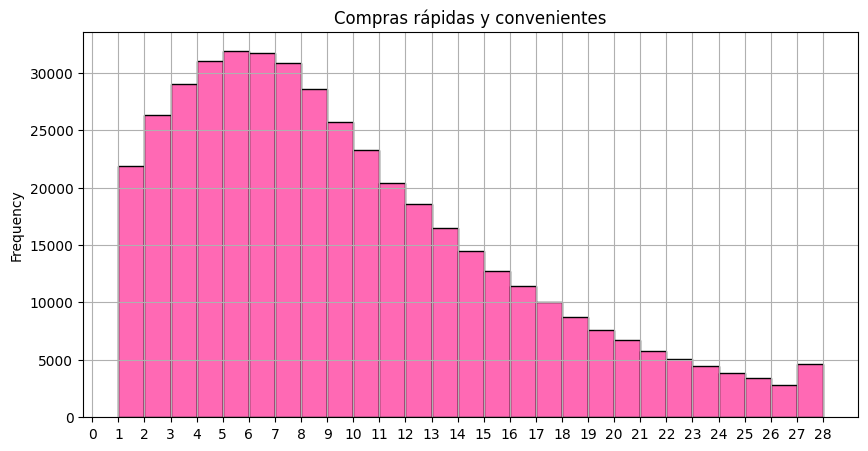

In [45]:
items_per_order.plot(kind= "hist", 
                                figsize=(10,5),
                                rot=360,
                                bins= range(1, orders_per_user.max() + 1),
                                edgecolor='black',
                                ylabel="Cantidad de articulos",
                                xlabel="Numero de pedidos",
                                color="hotpink",
                                grid=True,
                                title="Compras rápidas y convenientes")
plt.xticks(np.arange(0, max_orders + 1, step=1))
plt.show()

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [46]:
reordered_counts = df_order_pro[df_order_pro['reordered'] == 1]['product_id'].value_counts()
# Obtener los 20 productos más pedidos que se vuelven a pedir
top_reordered_products = reordered_counts.head(20)

# Unir con el DataFrame de productos para obtener los nombres de los productos
top_reordered_products = pd.DataFrame(top_reordered_products).reset_index()
top_reordered_products.columns = ['product_id', 'reorder_count']
top_reordered_products = top_reordered_products.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')
print(top_reordered_products[['product_id', 'product_name', 'reorder_count']])


    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277  Apple Honeycrisp Organic        

Los datos muestran que los productos más reordenados en Instacart son principalmente frutas y verduras orgánicas, como plátanos, fresas y espinacas bebé. Este patrón refleja una preferencia por productos frescos y saludables entre los usuarios. Además, la inclusión de productos lácteos orgánicos y básicos como limones y cebollas indica una demanda constante de ingredientes esenciales. Estos insights son clave para ajustar estrategias de inventario y satisfacer mejor las necesidades de los clientes, promoviendo una experiencia de compra más personalizada y eficiente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
# Calcular la cantidad total de pedidos por producto
total_pedidos_por_producto = df_order_pro['product_id'].value_counts()

# Calcular la cantidad de veces que cada producto se vuelve a pedir
pedidos_repetidos_por_producto = df_order_pro.groupby('product_id')['reordered'].sum()

# Calcular la proporción de veces que se pide y se vuelve a pedir (tasa de reorden)
tasa_reorden = pedidos_repetidos_por_producto / total_pedidos_por_producto

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame({
    'total_pedidos': total_pedidos_por_producto,
    'pedidos_repetidos': pedidos_repetidos_por_producto,
    'tasa_reorden': tasa_reorden
})

# Resetear el índice para poder fusionar correctamente
df_resultados = df_resultados.reset_index()

# Renombrar la columna 'index' a 'product_id'
df_resultados = df_resultados.rename(columns={'index': 'product_id'})

# Fusionar con el DataFrame de productos para obtener los nombres de los productos
df_resultados = df_resultados.merge(df_products[['product_id', 'product_name']], on='product_id')

# Mostrar los primeros 20 productos con sus cantidades totales de pedidos, pedidos repetidos y tasa de reorden
print("Resultados:")
print(df_resultados[['product_id', 'product_name', 'total_pedidos', 'pedidos_repetidos', 'tasa_reorden']].head(20))


Resultados:
    product_id                                       product_name  \
0            1                         Chocolate Sandwich Cookies   
1            2                                   All-Seasons Salt   
2            3               Robust Golden Unsweetened Oolong Tea   
3            4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4            7                     Pure Coconut Water With Orange   
5            8                  Cut Russet Potatoes Steam N' Mash   
6            9                  Light Strawberry Blueberry Yogurt   
7           10     Sparkling Orange Juice & Prickly Pear Beverage   
8           11                                  Peach Mango Juice   
9           12                         Chocolate Fudge Layer Cake   
10          13                                  Saline Nasal Mist   
11          14                     Fresh Scent Dishwasher Cleaner   
12          17                                  Rendered Duck Fat   
13          18        

El análisis revela que ciertos productos, como "Chocolate Sandwich Cookies" y "Light Strawberry Blueberry Yogurt", son altamente reordenados por los clientes de Instacart, indicando una fuerte preferencia y satisfacción. Por otro lado, productos como "All-Seasons Salt" y "Gluten Free Quinoa Three Cheese & Mushroom Blend" muestran tasas de reorden más bajas, sugiriendo una menor demanda continua. Estos hallazgos destacan la importancia de gestionar inventarios basados en el comportamiento de compra para optimizar la satisfacción del cliente y maximizar las oportunidades de venta recurrente.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [51]:
# Unir df_order_pro con df_orders para obtener user_id
merged_df = pd.merge(df_order_pro, df_orders[['order_id', 'user_id']], on='order_id', how='left')

# Calcular el número total de productos pedidos por cada cliente
total_productos_por_cliente = merged_df.groupby('user_id')['product_id'].size()

# Calcular el número de productos reordenados por cada cliente
productos_reordenados_por_cliente = merged_df.groupby('user_id')['reordered'].mean()

# Mostrar los resultados
print("Número total de productos pedidos por cliente:")
print(total_productos_por_cliente.head(10))  # Mostrar los primeros 10 clientes

print("\nProporción de productos reordenados por cliente:")
print(productos_reordenados_por_cliente.head(10))  # Mostrar los primeros 10 clientes

Número total de productos pedidos por cliente:
user_id
2     26
4      2
5     12
6      4
7     14
11    15
12    12
13    23
14    61
15    13
Name: product_id, dtype: int64

Proporción de productos reordenados por cliente:
user_id
2     0.038462
4     0.000000
5     0.666667
6     0.000000
7     0.928571
11    0.200000
12    0.250000
13    0.565217
14    0.360656
15    0.538462
Name: reordered, dtype: float64


Los clientes muestran variabilidad en la cantidad total de productos pedidos, desde 2 hasta 61 productos, indicando diferentes comportamientos de compra.La proporción de productos reordenados varía significativamente, reflejando diferencias en la repetición de compras entre los clientes. Estos insights son clave para segmentar clientes y personalizar estrategias de marketing, mejorando la satisfacción y fidelidad del cliente en Instacart.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buena utilización  de la agrupación de los valores. Pero en este caso nos piden sacar el dato para cada cliente, en este sentido dentro del groupby te sugiero utilizar la variable 'user_id' y en este caso el ejercicio hace referencia a cuál es la proporción de veces que se vuleve a pedir cada producto. Es por ello que la variable que nos interesa hacer el mean es ['reordered'] 
    
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# Filtrar los productos que fueron agregados en primer lugar al carrito
primeros_en_carrito = df_order_pro[df_order_pro['add_to_cart_order'] == 1]

# Contar la frecuencia de cada producto agregado primero al carrito
top_20_primeros_en_carrito = primeros_en_carrito['product_id'].value_counts().head(20)

# Obtener los nombres de los productos correspondientes
top_20_primeros_en_carrito = top_20_primeros_en_carrito.reset_index()
top_20_primeros_en_carrito.columns = ['product_id', 'count']
top_20_primeros_en_carrito = pd.merge(top_20_primeros_en_carrito, df_products[['product_id', 'product_name']], on='product_id')

# Mostrar los resultados
print("Los 20 principales artículos que las personas ponen primero en sus carritos:")
print(top_20_primeros_en_carrito)

Basado en el análisis de los datos de Instacart, podemos concluir que los clientes tienden a agregar una variedad de productos a sus carritos como primer artículo. Entre los 20 principales artículos que se colocan primero, encontramos una diversidad que incluye desde snacks y productos básicos de cocina hasta bebidas y alimentos frescos. Esto sugiere que los usuarios aprovechan la conveniencia de la plataforma para satisfacer diferentes necesidades alimenticias y de consumo de manera eficiente desde el inicio de sus compras. Este comportamiento también puede influir en las estrategias de recomendación y marketing de Instacart para mejorar la experiencia del cliente y fomentar compras repetidas.

### Conclusion general del proyecto:

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera, análisis de duplicados, y de valores faltantes. Además dearrollaste de buena manera los diferentes anális que se solicitaban y cuando podías los complementabas con greaficas. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Revisar que los filtros sean correctos en algunos apartados con base en la indicación
    
    
*  Realizar análisis complementarios eliminando los valores que parecen ser atípicos. 

    
*  Profundizar en los resultados intermedios y en la conclusión final.

</div>